In [1]:
!pip install datasets evaluate transformers[sentencepiece]
!pip install git+https://github.com/csebuetnlp/normalizer
!pip install accelerate -U
!pip install bnemo
!pip install bnunicodenormalizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.1 MB/s eta 0:00:00
  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-9xkqqd2v
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-9xkqqd2v
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... don

In [2]:
!wget https://www.dropbox.com/s/kc77yps787sqt92/kaggle.json

--2023-11-21 14:38:31--  https://www.dropbox.com/s/kc77yps787sqt92/kaggle.json
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/kc77yps787sqt92/kaggle.json [following]
--2023-11-21 14:38:31--  https://www.dropbox.com/s/raw/kc77yps787sqt92/kaggle.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc36c4bc08239768b24ef5a98c0a.dl.dropboxusercontent.com/cd/0/inline/CH-A57eFrIjsRrUccE7Vtzwee3GgzOqse74k1C1B36vWXUHZK0dD2aoDUoVg8kEiIdRWZL8k1ZRxcu-FMg52RsqbQq_f9FcpAR59iYsF3FuRvdDOvefNWHzxyOJk6HIRmC5OsAN6Co8nL5NMxrgK4yFh/file# [following]
--2023-11-21 14:38:31--  https://uc36c4bc08239768b24ef5a98c0a.dl.dropboxusercontent.com/cd/0/inline/CH-A57eFrIjsRrUccE7Vtzwee3GgzOqse74k1C1B36vWXUHZK0dD2aoDUoVg8kEiIdRWZL8k1ZRxcu-FMg52RsqbQq_f9FcpAR59iYsF3

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download nlp-competition-cuet-ete-day-2023

  0% 0.00/5.49M [00:00<?, ?B/s]
100% 5.49M/5.49M [00:00<00:00, 122MB/s]


In [5]:
import os
import zipfile
zip_ref = zipfile.ZipFile("./nlp-competition-cuet-ete-day-2023.zip", "r")
zip_ref.extractall("dataset")
zip_ref.close()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import keras
from sklearn.metrics import classification_report, confusion_matrix,f1_score, accuracy_score
from sklearn.model_selection import train_test_split


In [122]:
df_train = pd.read_csv("/content/dataset/train.csv")
df_test = pd.read_csv("/content/dataset/test.csv")

In [123]:
df_train

,summary,genre,Label
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3
...,...,...,...
3882,"বিশ্ববিদ্যালয়ের অভ্যন্তরীণ কিছু ঘটনা, কিছু মা...",Fiction,0
3883,২০০৫ সালে সপ্তম শ্রেণীতে উঠে সাপ্তাহিক বই পড়া ...,Science-Fiction,4
3884,আবহমান গ্রাম বাংলার একটি একান্নবর্তী পরিবারের ...,Fiction,0
3885,আমার মত যারা ৯০'র দশকে জন্ম তারা আমরা অনেকেই ১...,Political,3


In [124]:
df_test.head()

,Id,summary
0,0,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...
1,1,বইঃ দ্য সান অফ লাইট (রামেসিস #1) লেখকঃ ক্রিশ্চ...
2,2,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...
3,3,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...
4,4,অনেক সুন্দর এবং অসাধারণ একটি বই.... মধ্যবিত্ত...


In [125]:
print(df_train.shape)
print(df_test.shape)

(3887, 3)
(687, 2)


In [126]:
df_train.dtypes

summary    object
genre      object
Label       int64
dtype: object

In [127]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  3886 non-null   object
 1   genre    3887 non-null   object
 2   Label    3887 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 91.2+ KB


In [128]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       687 non-null    int64 
 1   summary  687 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.9+ KB


In [129]:
df_train = df_train.dropna()

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 3886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  3886 non-null   object
 1   genre    3886 non-null   object
 2   Label    3886 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.4+ KB


In [131]:
df_train["Number of Words"] = df_train["summary"].apply(lambda n: len(n.split()))
df_train.head()

<ipython-input-131-fc9ce59d8751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Number of Words"] = df_train["summary"].apply(lambda n: len(n.split()))


,summary,genre,Label,Number of Words
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,676
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,67
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0,214
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0,380
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3,13


<Axes: >

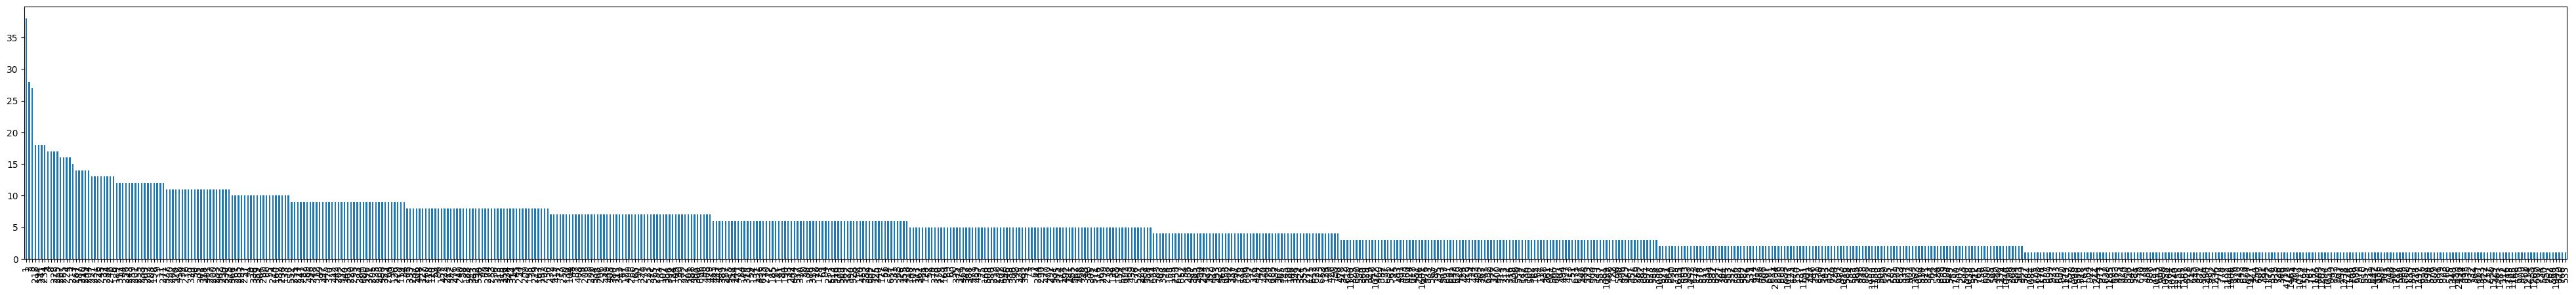

In [132]:
df_train['Number of Words'].value_counts().plot(figsize=(50,5), kind='bar')

In [133]:
df_train["Number of Words"].mean()

313.4565105506948

In [134]:
df_train['Label'].unique()

array([2, 0, 3, 1, 4, 6, 5])

In [135]:
df_train['Label'].value_counts()

0    1345
1     702
2     497
3     439
4     410
5     297
6     196
Name: Label, dtype: int64

In [136]:
df_train[df_train['Number of Words']>512].count()

summary            624
genre              624
Label              624
Number of Words    624
dtype: int64

In [137]:
df_train[df_train['Number of Words']>640].count()

summary            342
genre              342
Label              342
Number of Words    342
dtype: int64

In [138]:
df_train[df_train['Number of Words']>768].count()

summary            178
genre              178
Label              178
Number of Words    178
dtype: int64

In [139]:
df_train[df_train['Number of Words']>1024].count()

summary            79
genre              79
Label              79
Number of Words    79
dtype: int64

In [140]:
df_train[df_train['Number of Words']>1536].count()

summary            17
genre              17
Label              17
Number of Words    17
dtype: int64

In [141]:
df_train.columns

Index(['summary', 'genre', 'Label', 'Number of Words'], dtype='object')

In [142]:
df_train = df_train.drop(['genre', 'Number of Words'], axis =1)
df_train

,summary,Label
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,2
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,0
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,0
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,0
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,3
...,...,...
3882,"বিশ্ববিদ্যালয়ের অভ্যন্তরীণ কিছু ঘটনা, কিছু মা...",0
3883,২০০৫ সালে সপ্তম শ্রেণীতে উঠে সাপ্তাহিক বই পড়া ...,4
3884,আবহমান গ্রাম বাংলার একটি একান্নবর্তী পরিবারের ...,0
3885,আমার মত যারা ৯০'র দশকে জন্ম তারা আমরা অনেকেই ১...,3


In [143]:
df_train.iloc[1407]

summary    বাংলা সাহিত্যের এক প্রবাদ পুরুষ রকিব হাসান। কি...
Label                                                      4
Name: 1408, dtype: object

In [144]:
!gdown 1Np3KpQc6WJPLsSfaWh4LmtgdChjv6Lj5

Downloading...
From: https://drive.google.com/uc?id=1Np3KpQc6WJPLsSfaWh4LmtgdChjv6Lj5
To: /content/bengali.txt
100% 5.00k/5.00k [00:00<00:00, 17.3MB/s]


In [145]:
import re
from bnemo import Translator
import unicodedata
from bnunicodenormalizer import Normalizer

translator = Translator()
bnorm = Normalizer(allow_english=True)

# Regex for matching zero witdh joiner variations.
STANDARDIZE_ZW = re.compile(r'(?<=\u09b0)[\u200c\u200d]+(?=\u09cd\u09af)')

# Regex for removing standardized zero width joiner, except in edge cases.
DELETE_ZW = re.compile(r'(?<!\u09b0)[\u200c\u200d](?!\u09cd\u09af)')

# Regex matching punctuations to remove.
PUNC = re.compile(r'[`£|¢|Ñ+*/=–•।!()\[\]{};:\',"“\\’<>./?@#$^&*_~‘—॥”‰�￰￰]+')

# Regex to concate the numbers which are seperated by ,
pattern = r'(\d+)[ ,]+(\d+)'

stp_words = open("bengali.txt",'r',encoding='utf-8').read().split()


def concate(text):
  return re.sub(pattern, r'\1\2', text)

def removeOptionalZW(text):
    """
    Removes all optional occurrences of ZWNJ or ZWJ from Bangla text.
    """
    text = STANDARDIZE_ZW.sub('\u200D', text)
    text = re.sub(r'\u200d', '', text)
    text = DELETE_ZW.sub('', text)
    return text

def removePunc(text):
    """
    Remove for punctuations from text.
    """
    text = PUNC.sub(r"", text)
    return text

def normalizeUnicode(text, normalize_nukta=True):
    """
    Normalizes unicode strings using the Normalization Form Canonical
    Composition (NFC) scheme where we first decompose all characters and then
    re-compose combining sequences in a specific order as defined by the
    standard in unicodedata module. Finally all zero-width joiners are
    removed.
    """
    if normalize_nukta:
        words = [ bnorm(word)['normalized']  for word in text.split() ]
        text = " ".join([word for word in words if word is not None])
        text = text.replace("\u2047", "-")

    text = text.replace(u"\u098c", u"\u09ef")
    text = unicodedata.normalize("NFC", text)
    text = removeOptionalZW(text)
    text = removePunc(text)

    return text

def emoji2btext(raw):
  txt = translator.translate(raw).text
  return raw if len(txt)==0 else txt

def lowercase_all_english_letters(text):
  pattern = re.compile(r"[A-Z]")
  lowercased_text = pattern.sub(lambda match: match.group().lower(), text)
  return lowercased_text
def remove_stopwords(text):
    """
    This function will remove the stopwords from a review.
    """
    text = text.split()
    text = [word.strip() for word in text if word not in stp_words ]
    text =" ".join(text)
    return text

def preprocessing(text):
  txt = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
  txt = lowercase_all_english_letters(txt)
  txt = emoji2btext(txt)
  txt = remove_stopwords(txt)
  txt = concate(txt)
  txt = txt.replace('%', ' শতাংশ')
  return normalizeUnicode(txt)

In [146]:
df_train["summary"] = df_train["summary"].apply(lambda x: preprocessing(x))
df_test["summary"] = df_test["summary"].apply(lambda x: preprocessing(x))


In [147]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 3886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  3886 non-null   object
 1   Label    3886 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 91.1+ KB


In [148]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       687 non-null    int64 
 1   summary  687 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.9+ KB


In [149]:
(df_train.summary == "").count()

3886

In [150]:
df_train.drop(df_train[df_train.summary == ''].index, inplace=True)
df_test.drop(df_test[df_test.summary ==''].index, inplace= True)


In [151]:
print(df_train.shape)
print(df_test.shape)

(3885, 2)
(687, 2)


In [152]:
df_train.rename(columns = {"Label": "labels"}, inplace = True)
df_train.head()

,summary,labels
0,bookreview বইঃ চাঁদের পাহাড় ধরনঃ অ্যাডভেঞ্চার...,2
1,বেশির ভাগ বই ভাললাগে টাইপের বই ফার্স্ট পড়লাম ...,0
2,মিসির আলি ছাত্র ফারুকের শ্বশুর বাড়ি কইলাটি গ্...,0
3,ছোটজাতের ছোটজাত হাসিম পিতৃপ্রদত্ত নামখানা একরক...,0
4,ফালতু একটা বই পয়সা নষ্ট বাজে লেখনী জিনিস বারব...,3


In [153]:
df_train.to_csv("clean_df_train.csv", index = False)
df_test.to_csv("clean_df_test.csv", index = False)

In [154]:
# df_temp = df_train
# df_temp, df_val = train_test_split(df_temp, test_size = 0.20, random_state =10)

df_train, df_val = train_test_split(df_train, test_size = 0.20, random_state =10)
print(df_train.shape)
print(df_val.shape)

(3108, 2)
(777, 2)


In [155]:
y_test = df_val["labels"]
print(type(y_test))
y_test[:5]

<class 'pandas.core.series.Series'>


2792    0
2909    0
882     0
2929    1
1309    4
Name: labels, dtype: int64

In [156]:
df_val.head(5)

,summary,labels
2792,ঘুম ভাঙার শুভ্রর সময় ইচ্ছে করে ঘরে দেয়ালঘড়ি...,0
2909,অপ্সরা আসিফ মেহদীর লেখা প্রথম জীবনঘনিষ্ঠ উপন্য...,0
882,one of the best novel u have ever readand the ...,0
2929,রকমারিবইপোকারিভিউপ্রতিযোগিতা বইয়ের নাম শ্বাপদ...,1
1309,রকমারিবইপোকারিভিউপ্রতিযোগিতা গভীর রাত পাশের টে...,4


In [157]:
df_train.head()

,summary,labels
3040,রকমারিবইপোকারিভিউপ্রতিযোগিতা একটা সময় ছিলো অল...,1
696,বাংলাদেশের কিশোর উপন্যাসের ইতিহাসে নামটি এখনো ...,2
3373,ভূমিকা একটু সচেতন মানুষ ভাল পারে ভালো থাকতে পা...,6
3396,বইয়ের ফ্ল্যাপটা অসাধারন হয়েছে বইটা পরতে শুরু...,2
2834,উপন্যাস শুরু হয় চৈত্রের এক ঝকঝকে দিনে শান্ত ...,0


In [158]:
df_train.to_csv('processed_train.csv', index=False)
df_test.to_csv('processed_test.csv', index=False)
df_val.to_csv("processed_val.csv", index = False)

# Model Selection and Data Processing

In [176]:
train_split = '/content/processed_train.csv'
val_split = '/content/processed_val.csv'
test_split = "/content/processed_test.csv"


In [177]:
from datasets import load_dataset
train_dataset = load_dataset("csv", data_files=train_split)
val_dataset = load_dataset("csv", data_files=val_split)
test_dataset = load_dataset("csv", data_files=test_split)

In [178]:
# # Load the datasets
# data_files = {
#     "train": "train_pair.csv",
#     "test": "test_pair.csv",
#     "val": "val_pair.csv"
# }
# datasets = load_dataset('csv', data_files=data_files)

# # tokenize the dataset
# def tokenize_function(batch):
#     # Get the maximum length from the model configuration
#     max_length = 512

#     # Tokenize each text separately and truncate to half the maximum length
#     tokenized_text1 = tokenizer(batch['text1'], truncation=True, max_length=int(max_length/2), add_special_tokens=True)
#     tokenized_text2 = tokenizer(batch['text2'], truncation=True, max_length=int(max_length/2), add_special_tokens=True)

#     # Merge the results
#     tokenized_inputs = {
#         'input_ids': tokenized_text1['input_ids'] + tokenized_text2['input_ids'][1:],  # exclude the [CLS] token from the second sequence
#         'attention_mask': tokenized_text1['attention_mask'] + tokenized_text2['attention_mask'][1:]
#     }
#     return tokenized_inputs

# # Tokenize the datasets
# tokenized_datasets = datasets.map(tokenize_function, batched=True)

In [179]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
max_length= 320

checkpoint = "csebuetnlp/banglabert"
# checkpoint = "csebuetnlp/banglabert_large"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
    return tokenizer(example["summary"], truncation=True, padding = True,  max_length=max_length)

tokenized_train_datasets = train_dataset.map(tokenize_function, batched=True)
tokenized_val_datasets = val_dataset.map(tokenize_function, batched=True)
tokenized_test_datasets = test_dataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/777 [00:00<?, ? examples/s]

In [180]:
tokenized_train_datasets["train"].column_names

['summary', 'labels', 'input_ids', 'token_type_ids', 'attention_mask']

In [181]:
tokenized_test_datasets["train"].column_names

['Id', 'summary', 'input_ids', 'token_type_ids', 'attention_mask']

In [182]:
tokenized_train_datasets = tokenized_train_datasets.remove_columns(["summary", 'token_type_ids'])
tokenized_train_datasets.set_format("torch")
print(tokenized_train_datasets["train"].column_names)

tokenized_val_datasets = tokenized_val_datasets.remove_columns(["summary", 'token_type_ids'])
tokenized_val_datasets.set_format("torch")
print(tokenized_val_datasets["train"].column_names)


tokenized_test_datasets = tokenized_test_datasets.remove_columns(["Id", "summary", 'token_type_ids'])
tokenized_test_datasets.set_format("torch")
print(tokenized_test_datasets["train"].column_names)


['labels', 'input_ids', 'attention_mask']
['labels', 'input_ids', 'attention_mask']
['input_ids', 'attention_mask']


In [183]:
from datasets import load_metric
def compute_metrics(eval_preds):
    metric = load_metric("f1")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels, average = 'macro')


In [184]:
import torch
torch.cuda.empty_cache()

In [185]:
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from transformers import AdamW, get_scheduler


training_args = TrainingArguments("Fine-tuned-BanglaBERT_large",
                                  evaluation_strategy="epoch",
                                  learning_rate=2e-5,
                                  warmup_ratio=0.1,
                                  gradient_accumulation_steps=2,
                                  weight_decay=0.01,
                                  lr_scheduler_type="linear",
                                  num_train_epochs=5,
                                  seed=1234,
                                  overwrite_output_dir=True,
                                  remove_unused_columns=False,
                                  local_rank= 1,
                                  load_best_model_at_end=True,
                                  save_total_limit=2,
                                  save_strategy="epoch",
                                  per_device_train_batch_size=8,
                                  per_device_eval_batch_size=8,
                                  optim='adafactor'
                                  )


dropout_rate = 0.3
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=7)
model.config.hidden_dropout_prob = dropout_rate

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_train_datasets["train"],
    eval_dataset=tokenized_val_datasets["train"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,

    # callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [186]:
trainer.train()

You're using a ElectraTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1
0,No log,1.005614,0.568387
2,1.013300,0.541953,0.833962
4,1.013300,0.477566,0.845419


TrainOutput(global_step=970, training_loss=0.6794155946711904, metrics={'train_runtime': 1013.5365, 'train_samples_per_second': 15.332, 'train_steps_per_second': 0.957, 'total_flos': 2549660583168000.0, 'train_loss': 0.6794155946711904, 'epoch': 4.99})

# Prediction

In [193]:
pred = trainer.predict(tokenized_val_datasets['train'])
y = pred.predictions
y_pred = np.argmax(y, axis=-1)
y_pred[:5]

array([0, 0, 0, 1, 4])

In [194]:
y_test = df_val["labels"].values
y_test[:5]

array([0, 0, 0, 1, 4])

In [195]:
print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average = 'macro'))
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       251
           1       0.86      0.92      0.89       129
           2       0.93      0.78      0.85       117
           3       0.81      0.70      0.75        94
           4       0.90      0.89      0.89        80
           5       0.71      0.72      0.71        57
           6       0.92      0.92      0.92        49

    accuracy                           0.86       777
   macro avg       0.86      0.84      0.85       777
weighted avg       0.86      0.86      0.86       777

0.8454185403661312
0.8622908622908623


array([[237,   3,   2,   3,   2,   2,   2],
       [  7, 119,   2,   0,   1,   0,   0],
       [  5,  12,  91,   0,   5,   3,   1],
       [ 16,   0,   0,  66,   0,  12,   0],
       [  2,   5,   1,   0,  71,   0,   1],
       [  5,   0,   1,  10,   0,  41,   0],
       [  1,   0,   1,   2,   0,   0,  45]])

In [196]:
pred = trainer.predict(tokenized_test_datasets['train'])
y = pred.predictions
y_pred = np.argmax(y, axis=-1)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [197]:
df = pd.DataFrame()
df["Id"] = df_test["Id"]
df["Label"] = y_pred

In [199]:
df

,Id,Label
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
682,682,1
683,683,3
684,684,0
685,685,1


In [198]:
df.to_csv("series2.csv", index = False)

# Save the model

In [75]:
!zip -r model-normalize.zip '/content/Fine-tuned-BanglaBERT_large'
from google.colab import drive
drive.mount('/content/drive')
import shutil

shutil.copyfile('/content/model-normalize.zip', '/content/drive/MyDrive/banglabert2.zip')

  adding: content/Fine-tuned-BanglaBERT_large/ (stored 0%)
  adding: content/Fine-tuned-BanglaBERT_large/runs/ (stored 0%)
  adding: content/Fine-tuned-BanglaBERT_large/runs/Nov21_09-59-48_c2f8cb1ae9f1/ (stored 0%)
  adding: content/Fine-tuned-BanglaBERT_large/runs/Nov21_09-59-48_c2f8cb1ae9f1/events.out.tfevents.1700560797.c2f8cb1ae9f1.397.0 (deflated 59%)
  adding: content/Fine-tuned-BanglaBERT_large/runs/Nov21_10-23-48_c2f8cb1ae9f1/ (stored 0%)
  adding: content/Fine-tuned-BanglaBERT_large/runs/Nov21_10-23-48_c2f8cb1ae9f1/events.out.tfevents.1700562231.c2f8cb1ae9f1.397.1 (deflated 59%)
  adding: content/Fine-tuned-BanglaBERT_large/checkpoint-826/ (stored 0%)
  adding: content/Fine-tuned-BanglaBERT_large/checkpoint-826/special_tokens_map.json (deflated 42%)
  adding: content/Fine-tuned-BanglaBERT_large/checkpoint-826/tokenizer_config.json (deflated 74%)
  adding: content/Fine-tuned-BanglaBERT_large/checkpoint-826/trainer_state.json (deflated 65%)
  adding: content/Fine-tuned-BanglaBER

'/content/drive/MyDrive/banglabert1.zip'

# Code to load saved model

In [76]:
# drive link here
!gdown 1TrTF8ZaeGjA5L2XeMTDtpQOeSL82oIjO

Downloading...
From: https://drive.google.com/uc?id=1TrTF8ZaeGjA5L2XeMTDtpQOeSL82oIjO
To: /content/banglabert1.zip
100% 824M/824M [00:07<00:00, 107MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/banglabert1.zip", 'r')
zip_ref.extractall("model")
zip_ref.close()

In [ ]:
# Change checkpoint in accordance
import torch
from transformers import AutoModelForSequenceClassification
model =  AutoModelForSequenceClassification.from_pretrained("/content/model/content/Fine-tuned-BanglaBERT/checkpoint-2204")
model.eval()

In [ ]:
from torch.utils.data import DataLoader
from transformers  import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
eval_dataloader = DataLoader(
    tokenized_test_datasets["train"], batch_size=16, collate_fn=data_collator
)

In [ ]:
import evaluate

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
device
y_pred =[]
model.eval()
for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    y_pred.extend(predictions.detach().cpu().numpy())